In [ ]:
import argparse
import numpy as np
seed = 123
np.random.seed(seed)
import random
import torch
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)

import pickle

from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler
import tqdm

In [ ]:
import os
os.chdir('/content/drive/MyDrive/Majorproject/intention')

In [ ]:
def svm_train(train_input, train_output, C_value):
    clf = svm.SVC(C=C_value, gamma='scale', kernel='rbf')

    return clf.fit(train_input, train_output)

In [ ]:
C = 1

with open("{}.pickle".format('model_result'), "rb") as f:
  train_dataset, test_dataset = pickle.load(f)

weighted_precision, weighted_recall = [], []
weighted_fscores = []

In [ ]:
dataset_index = 4
model = svm_train(train_dataset[dataset_index][0], train_dataset[dataset_index][1], 1)

In [ ]:
pred = model.predict(test_dataset[dataset_index][0])
label = test_dataset[dataset_index][1]

In [ ]:
cm = confusion_matrix(label,pred)
cm

array([[55, 22],
       [ 9, 51]])

<Axes: >

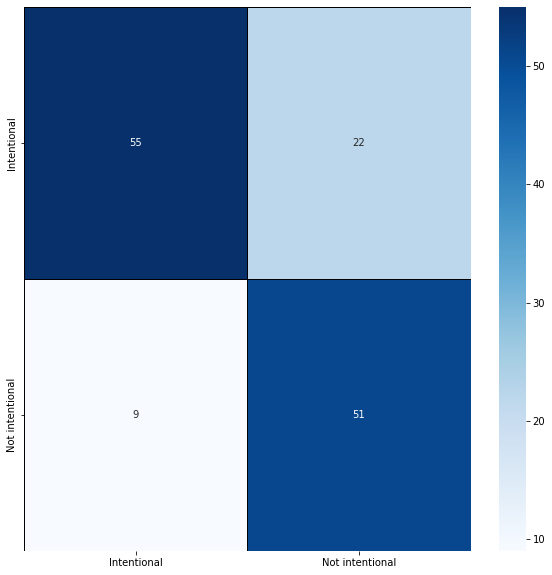

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

cm = pd.DataFrame(cm , index = ['Intentional','Not intentional'] , columns = ['Intentional','Not intentional'])
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Intentional','Not intentional'] , yticklabels = ['Intentional','Not intentional'])

In [ ]:
with open("{}.pickle".format('model_result_pred'), "rb") as f:
  pred_train_dataset, pred_test_dataset = pickle.load(f)

In [ ]:
import numpy as np
train_set = pred_train_dataset[dataset_index]
test_set = pred_test_dataset[dataset_index]

In [ ]:
model = svm_train(train_set[0], train_set[1], 1)

In [ ]:
pred = model.predict(test_set[0])
label = test_set[1]

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score      

print(classification_report(label, pred, target_names = ['Intentional','Not Intentional'], digits = 4))

                 precision    recall  f1-score   support

    Intentional     0.8750    0.7273    0.7943        77
Not Intentional     0.7123    0.8667    0.7820        60

       accuracy                         0.7883       137
      macro avg     0.7937    0.7970    0.7881       137
   weighted avg     0.8038    0.7883    0.7889       137



In [ ]:
cm = confusion_matrix(label,pred)
cm

array([[56, 21],
       [ 8, 52]])

<Axes: >

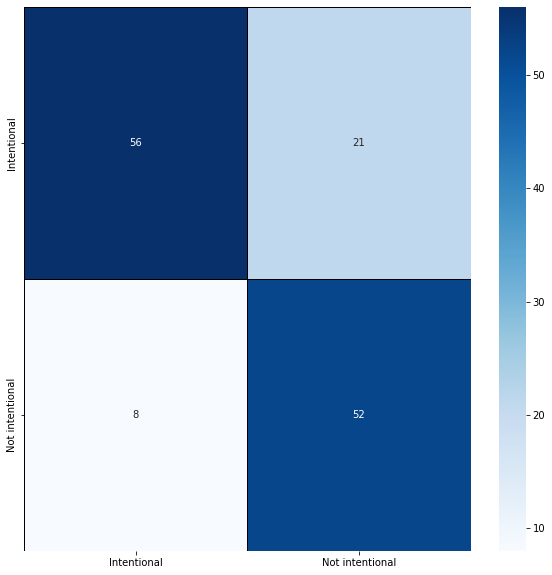

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

cm = pd.DataFrame(cm , index = ['Intentional','Not intentional'] , columns = ['Intentional','Not intentional'])
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Intentional','Not intentional'] , yticklabels = ['Intentional','Not intentional'])

In [ ]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
filename = 'finalized_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
import numpy as np

In [ ]:
def get_intention(filename , dataset_test , dataset_train):
  result = {0 : "Intentional" , 1 : "Non-Intentional"}
  if filename in dataset_test[2]:
    pred = loaded_model.predict(dataset_test[0])
    label = dataset_test[1]
    index = np.where(dataset_test[2] == filename)[0][0]
  elif filename in dataset_train[2]:
    pred = loaded_model.predict(dataset_train[0])
    label = dataset_train[1]
    index = np.where(dataset_train[2] == filename)[0][0]
  else:
    return -1
  print("The predicted utterance is {}".format(result[pred[index]]))
  print("The True utterance is {}".format(result[label[index]]))

In [ ]:
with open("{}.pickle".format('model_result_pred'), "rb") as f:
  pred_train_dataset, pred_test_dataset = pickle.load(f)

In [ ]:
dataset_index = 4
train_set = pred_train_dataset[dataset_index]
test_set = pred_test_dataset[dataset_index]

In [ ]:
get_intention('1_6766' , test_set , train_set)

The predicted utterance is Intentional
The True utterance is Intentional


In [ ]:
get_intention('1_11177' , test_set , train_set)

The predicted utterance is Non-Intentional
The True utterance is Non-Intentional


In [ ]:
get_intention('1_10495' , test_set , train_set)

The predicted utterance is Non-Intentional
The True utterance is Non-Intentional


In [ ]:
get_intention('1_2119' , test_set , train_set)

The predicted utterance is Non-Intentional
The True utterance is Non-Intentional


In [ ]:
get_intention('1_537' , test_set , train_set)

The predicted utterance is Non-Intentional
The True utterance is Non-Intentional


In [ ]:
get_intention('1_971' , test_set , train_set)

The predicted utterance is Non-Intentional
The True utterance is Non-Intentional


In [ ]:
get_intention('1_1803' , test_set , train_set)

The predicted utterance is Non-Intentional
The True utterance is Non-Intentional


In [ ]:
get_intention('1_1973' , test_set , train_set)

The predicted utterance is Non-Intentional
The True utterance is Non-Intentional


In [ ]:
get_intention('1_4789' , test_set , train_set)

The predicted utterance is Non-Intentional
The True utterance is Non-Intentional


In [ ]:
get_intention('1_5617' , test_set , train_set)

The predicted utterance is Non-Intentional
The True utterance is Non-Intentional


In [ ]:
get_intention('1_5699' , test_set , train_set)

The predicted utterance is Non-Intentional
The True utterance is Non-Intentional


In [ ]:
get_intention('1_8136' , test_set , train_set)

The predicted utterance is Non-Intentional
The True utterance is Non-Intentional
